In [87]:
import pandas as pd
import torch
import pandas as pd
from torch import optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [89]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")

In [91]:
column_summary_df = pd.DataFrame({
    'Column Name': spaceship.columns,
    'Data Type': spaceship.dtypes.values,
    'Percentage Null': spaceship.isnull().mean().values * 100,
    'Unique Values': spaceship.nunique().values
})
print(column_summary_df)

     Column Name Data Type  Percentage Null  Unique Values
0    PassengerId    object         0.000000           8693
1     HomePlanet    object         2.312205              3
2      CryoSleep    object         2.496261              2
3          Cabin    object         2.289198           6560
4    Destination    object         2.093639              3
5            Age   float64         2.059128             80
6            VIP    object         2.335212              2
7    RoomService   float64         2.082135           1273
8      FoodCourt   float64         2.105142           1507
9   ShoppingMall   float64         2.392730           1115
10           Spa   float64         2.105142           1327
11        VRDeck   float64         2.162660           1306
12          Name    object         2.300702           8473
13   Transported      bool         0.000000              2


In [93]:
spaceship.dropna(how = 'any', inplace=True)
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [95]:
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])

In [117]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [127]:
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x[0] if pd.notna(x) else None)

In [135]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [145]:
non_numeric_cols = spaceship.select_dtypes(exclude=['number'])
non_numeric_cols

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
0,Europa,False,B,TRAPPIST-1e,False,False
1,Earth,False,F,TRAPPIST-1e,False,True
2,Europa,False,A,TRAPPIST-1e,True,False
3,Europa,False,A,TRAPPIST-1e,False,False
4,Earth,False,F,TRAPPIST-1e,False,True
...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,True,False
8689,Earth,True,G,PSO J318.5-22,False,False
8690,Earth,False,G,TRAPPIST-1e,False,True
8691,Europa,False,E,55 Cancri e,False,False


In [209]:
df_dummies = pd.get_dummies(non_numeric_cols)
pd.set_option('display.max_columns', None)
df_dummies.shape

(6606, 19)

In [211]:
features = df_dummies.drop(columns=['Transported'])

In [213]:
target = df_dummies['Transported']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [217]:
y_train.shape

(5284,)

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train = np.array(y_train)
y_test = np.array(y_test)


y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [235]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),  
            nn.ReLU(),                           
            nn.Linear(hidden_size, output_size), 
            nn.Sigmoid()                         
        )
    
    def forward(self, x):
        return self.network(x)

In [237]:
input_size = 18
hidden_size = 35
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)

In [239]:
criterion = nn.BCELoss() #bce for classification (mse is for regression)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [241]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 500
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 0.1808
Epoch [100/500], Loss: 0.1798
Epoch [150/500], Loss: 0.1796
Epoch [200/500], Loss: 0.1794
Epoch [250/500], Loss: 0.1793
Epoch [300/500], Loss: 0.1793
Epoch [350/500], Loss: 0.1792
Epoch [400/500], Loss: 0.1792
Epoch [450/500], Loss: 0.1792
Epoch [500/500], Loss: 0.1791


Test Loss: 0.1777


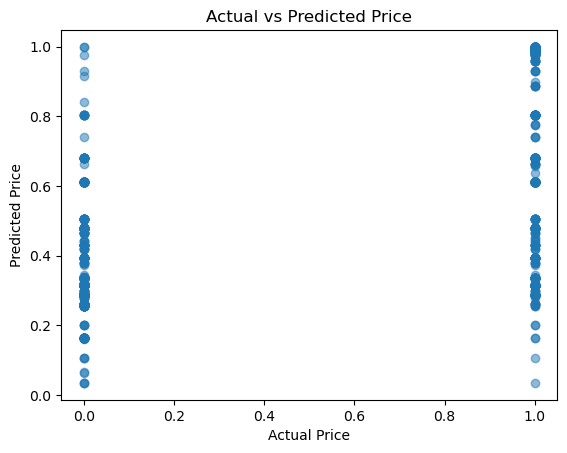

In [243]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()
